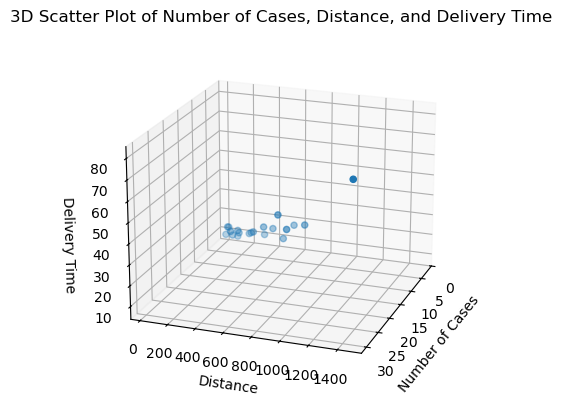

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = {
 "delivery_time":[17.68, 12.50, 13.03, 15.88, 14.75, 19.11, 9, 
18.83, 80.24, 22.50,
 41.33, 22, 14.50, 20.75, 25, 30, 16.35, 20, 10.50,
36.10],
 "number_of_cases":[7, 3, 3, 4, 6, 7, 2, 7, 30, 5, 16, 10, 4, 6, 9,
10, 6, 7, 3, 17],
 "distance":[560, 220, 340, 80, 150, 330, 110, 210, 1460, 605, 688,
215, 255, 462, 448,
 776, 200, 132, 36, 770]
}
df = pd.DataFrame(data)
y = df['delivery_time']
X = df[['number_of_cases','distance']]
X = sm.add_constant(X)
fitted_model = sm.OLS(y,X).fit()
fitted_model.summary()


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['number_of_cases'], df['distance'], df['delivery_time'])
ax.set_xlabel('Number of Cases')
ax.set_ylabel('Distance')
ax.set_zlabel('Delivery Time')
ax.set_title("3D Scatter Plot of Number of Cases, Distance, and Delivery Time")
# Adjust the elevation and azimuthal angle
ax.view_init(elev=20, azim=20)
plt.show()


In [5]:
#Verifying Gauss-Markov Theorm
ols_estimate = fitted_model.params
print("OLS Estimates:\n", ols_estimate)
#Variance of OLS Estimate
#Residual Sum of squares (RSS)
rss = np.sum(fitted_model.resid**2)
#Estimate of sigma^2
sigma_squared = rss/(len(y)-len(X.columns))
# Variance-Covariance Matrix (linalg - linear algebra)
var_cov_matrix = sigma_squared * np.linalg.inv(np.dot(X.T, X))
print("Variance-Covariance Matrix:\n", var_cov_matrix)
# Standard Errors of the Estimates
std_errors = np.sqrt(np.diag(var_cov_matrix))
print("Standard Errors:\n", std_errors)
mean_estimate = np.mean(y)
print("\nMean Estimate:\n", mean_estimate)

#Extracting from the summary of fitted model
std_errors = fitted_model.bse
print("Standard Errors:\n", std_errors)

sample_variance = np.var(y)
mean_variance = sample_variance / len(y)
print("Variance of Mean Estimate:", mean_variance)


#Comparison of some other estimate say intercept : 2 , Slope1 : 0.5 and Slope2 : 0.2
intercept = 3.5
Slope1 = 1.6
Slope2 = 0.01
y_predict = intercept + Slope1*df['number_of_cases'] +Slope2*df['distance']
residuals = df['delivery_time'] - y_predict
rss = np.sum(residuals**2)
sigma1_squared = rss/(len(y)-len(X.columns))
var_cov_matrix = sigma1_squared * np.linalg.inv(np.dot(X.T, X))
std_errors = np.sqrt(np.diag(var_cov_matrix))
print('\nstd errors:\n',std_errors)

OLS Estimates:
 const              3.470719
number_of_cases    1.818826
distance           0.011928
dtype: float64
Variance-Covariance Matrix:
 [[ 1.17133236e+00 -6.15959558e-02 -5.82992735e-04]
 [-6.15959558e-02  4.49378412e-02 -7.51585829e-04]
 [-5.82992735e-04 -7.51585829e-04  1.65796892e-05]]
Standard Errors:
 [1.08228109 0.21198547 0.00407182]

Mean Estimate:
 23.002500000000005
Standard Errors:
 const              1.082281
number_of_cases    0.211985
distance           0.004072
dtype: float64
Variance of Mean Estimate: 11.775706437499998

std errors:
 [1.66731271 0.32657512 0.00627285]
